### Gradient descent methods

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

We define a class that compute the loss function and gradient function, and record the value of loss function after each iteration

In [2]:
class Optimizer:
    def __init__(self, A):
        self.org_shape = A.shape
        # Avoid computing the Frobenius norm of the matrix
        self.A = A.flatten()
        self.shape = len(self.A)
        self.loss_history = []
    # Define the loss function
    def mse(self, X_flat):
        loss = 0.5 * np.sum((X_flat - self.A) ** 2)
        self.loss_history.append(loss)
        return loss
    # Define the gradient of loss function
    def gradient(self, X_flat):
        grad = X_flat - self.A
        return grad
    
    def optimize(self, initial=None):
        if initial is None:
            initial = np.random.rand(self.shape)
        # Use CG as conjugate gradient algorithm, jac is the gradient function
        # tol is the threshold of iteration
        regression = minimize(self.mse, initial, method='CG', tol=1e-6, jac=self.gradient)
        print(regression)
        result = np.reshape(regression.x, newshape=self.org_shape)
        return result
    
    def plot(self):
        plt.plot(self.loss_history, label="MSE Loss")
        plt.xlabel("Iteration")
        plt.ylabel("Loss")
        # Set the scale of x axis to only have integars
        plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
        plt.title("Loss Value per Iteration")
        plt.legend()
        plt.show()

Then use random matrix A for testing

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 0.0
       x: [ 6.114e-01  9.537e-01 ...  8.270e-01  1.409e-01]
     nit: 2
     jac: [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
    nfev: 5
    njev: 5
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


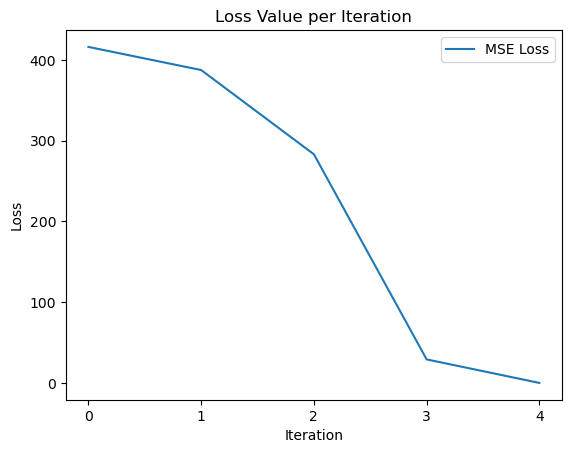

In [4]:
A = np.random.rand(100, 50)
opt = Optimizer(A)
opt_A = opt.optimize()
print(opt_A - A)
opt.plot()

This gradient descent method is essentially opt_A = X - (X-A), so it converage very quickly.